In [13]:
import sys
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy
import numpy as np



In [14]:
# Loading the dataset

data = pd.read_csv('creditcard.csv')

In [15]:
# Exploring the dataset

print(data.columns)

Index([u'Time', u'V1', u'V2', u'V3', u'V4', u'V5', u'V6', u'V7', u'V8', u'V9',
       u'V10', u'V11', u'V12', u'V13', u'V14', u'V15', u'V16', u'V17', u'V18',
       u'V19', u'V20', u'V21', u'V22', u'V23', u'V24', u'V25', u'V26', u'V27',
       u'V28', u'Amount', u'Class'],
      dtype='object')


In [16]:
print(data.shape)
print(data.describe)

(284807, 31)
<bound method DataFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
5            2.0  -0.425966   0.960523  1.141109 -0.168252  0.420987   
6            4.0   1.229658   0.141004  0.045371  1.202613  0.191881   
7            7.0  -0.644269   1.417964  1.074380 -0.492199  0.948934   
8            7.0  -0.894286   0.286157 -0.113192 -0.271526  2.669599   
9            9.0  -0.338262   1.119593  1.044367 -0.222187  0.499361   
10          10.0   1.449044  -1.176339  0.913860 -1.375667 -1.971383   
11          10.0   0.384978   0.616109 -0.874300 -0.094019  2.924584   
12          10.

In [17]:
data=data.sample(frac=0.1,random_state=1)
print(data.shape)

(28481, 31)


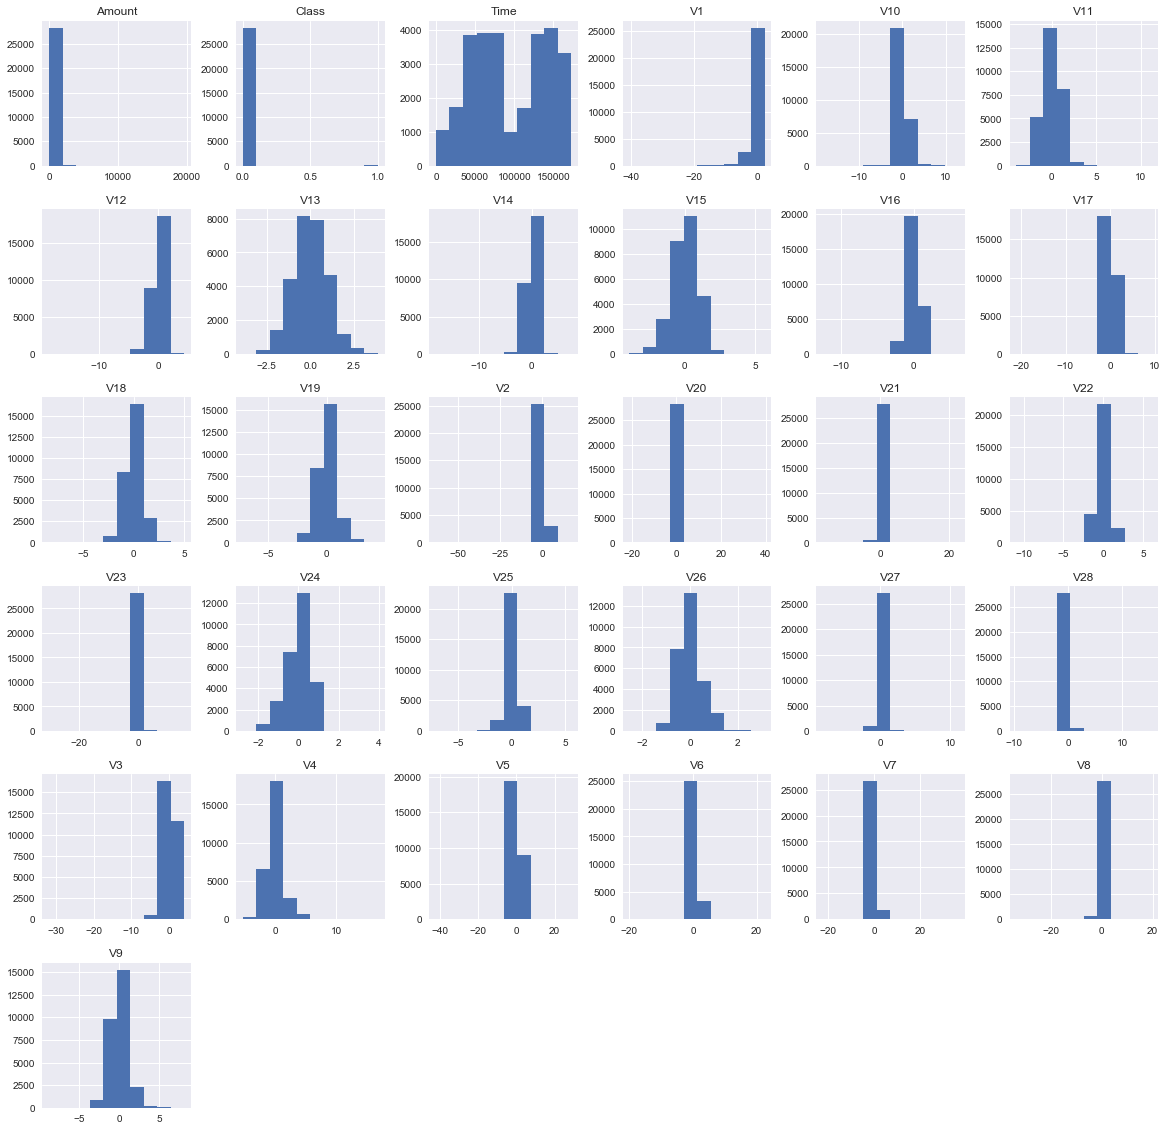

In [18]:
# Plot histogram of each parameter

data.hist(figsize=(20,20))
plt.show()

In [19]:
# determine fraud fraction
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]

outlier_fraction = len(fraud)/ float(len(valid))
print(outlier_fraction)
print('Fraud Cases : {}'.format(len(fraud)))
print('Valid Cases : {}'.format(len(valid)))


0.00172341024198
Fraud Cases : 49
Valid Cases : 28432


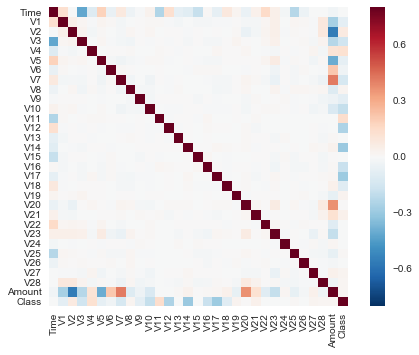

In [20]:
# Correlation matrix
corrmat = data.corr()
#fig = plt.figure(figsize=(12,9))

sns.heatmap(corrmat, vmax=0.8,square=True)
plt.show()

In [23]:
# Get all columns of dataset

columns = data.columns.tolist()

#Filter out columns we do not need

columns = [c for c in columns if c not in ["Class"]]

# Store target variable

target = "Class"
X = data[columns]
Y = data[target]

print(X.shape)
print(Y.shape)



(28481, 30)
(28481L,)


In [24]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest


# define a random state
state=1

# define the outlier detection method
classifier = IsolationForest(max_samples=len(X),
                                        contamination = outlier_fraction,
                                        random_state=state)
    

In [27]:
# Fit the model

n_outliers= len(fraud)

classifier.fit(X)
scores_pred=classifier.decision_function(X)
y_pred=classifier.predict(X)
        
        
# Reshape predicted values
y_pred[y_pred==1]=0
y_pred[y_pred==-1]=1
    
n_errors=(y_pred != Y).sum()
    
#Run classification metrics
print(n_errors)
print(accuracy_score(Y,y_pred))
print(classification_report(Y,y_pred))
    


    

71
0.997507110003
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28432
          1       0.28      0.29      0.28        49

avg / total       1.00      1.00      1.00     28481

